In [2084]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
from itertools import combinations

# 1. Modeling the activity of a single neuron

In [2085]:
data = np.loadtxt("Data_neuron.txt")

### Q1

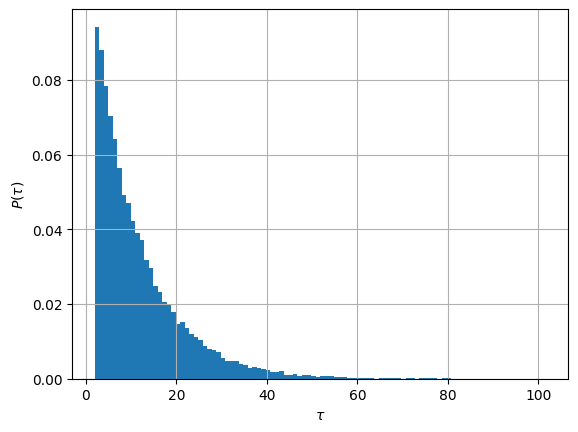

Refractory period is 1.8999999999650754 ms


In [2086]:
time_intervals = np.diff(data)

refractory_period = np.min(time_intervals)

plt.hist(time_intervals, bins=100, density=True)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$P(\tau)$')
plt.grid(True)
plt.savefig("figures/Q1")
plt.show()

print('Refractory period is', refractory_period, 'ms')

### Q2

/var/folders/1s/s3n0mk7s45n_8bvs1l6047sc0000gp/T/ipykernel_2621/2540038547.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(bin_centers, np.log(hist))


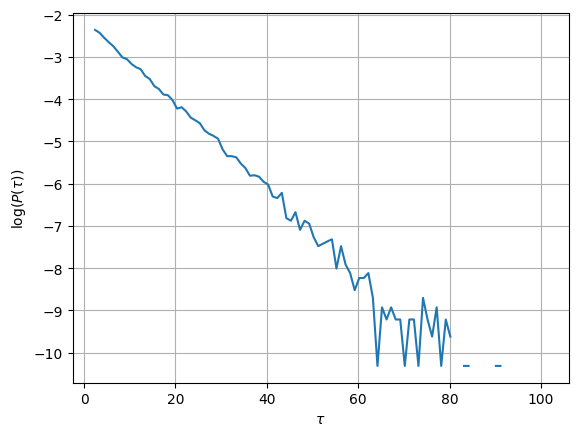

In [2087]:
hist, bin_edges = np.histogram(time_intervals, bins=100, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.plot(bin_centers, np.log(hist))
plt.xlabel(r'$\tau$')
plt.ylabel(r'log$(P(\tau))$')
plt.grid(True)
plt.savefig("figures/Q2")
plt.show()

In [2088]:
def exponential_distribution(t, rate):
    return rate * np.exp(-rate*t)

popt, pcov = curve_fit(exponential_distribution, bin_centers, hist)
decay_rate = popt[0]

print("Decay rate is", decay_rate)

Decay rate is 0.1159205243117732


### Q3

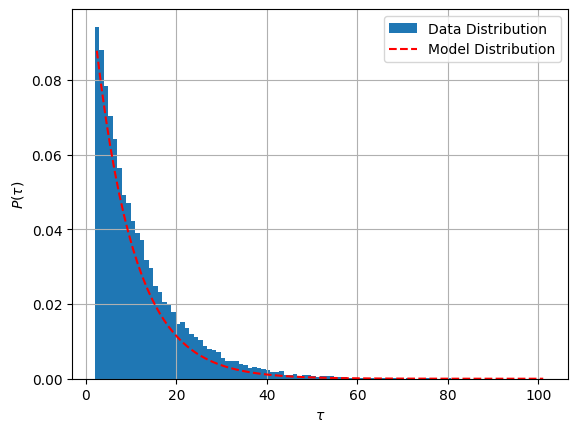

In [2089]:
def delayed_poisson_distribution(t, decay_rate, refractory_period):
    if t < refractory_period:
        return 0
    else:
        return exponential_distribution(t, decay_rate)

model_distribution = []
for t in bin_centers:
    P = delayed_poisson_distribution(t, decay_rate, refractory_period)
    model_distribution.append(P)


plt.hist(time_intervals, bins=100, density=True, label='Data Distribution')
plt.plot(bin_centers, model_distribution, 'r--', label='Model Distribution')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$P(\tau)$')
plt.grid(True)
plt.legend()
plt.savefig("figures/Q3")
plt.show()

### Q4

In [2090]:
def generate_spike_times(num_points, decay_rate, refractory_period):

    spike_times = []
    
    t = 0 

    while len(spike_times) < num_points:
        inter_spike_interval = np.random.exponential(1 / decay_rate)
        while inter_spike_interval < refractory_period:
            inter_spike_interval = np.random.exponential(1 / decay_rate)
        t += inter_spike_interval
        spike_times.append(t)

    return np.array(spike_times)

generated_spike_times = generate_spike_times(1000, decay_rate, refractory_period)
print(generated_spike_times)


[4.68515505e+00 3.22970814e+01 4.86809089e+01 5.25683088e+01
 5.58902446e+01 6.49061419e+01 9.84645235e+01 1.02736484e+02
 1.09519441e+02 1.22584796e+02 1.44770654e+02 1.70955115e+02
 1.75097332e+02 2.02286766e+02 2.14019354e+02 2.29942498e+02
 2.36984176e+02 2.44202621e+02 2.47019698e+02 2.58081625e+02
 2.66752856e+02 2.97551043e+02 3.00641072e+02 3.28607435e+02
 3.30815129e+02 3.38269849e+02 3.44280297e+02 3.46841738e+02
 3.53781333e+02 3.66367598e+02 3.72495195e+02 3.76067041e+02
 3.78059104e+02 3.88529474e+02 3.91563914e+02 4.11597127e+02
 4.21915002e+02 4.28877227e+02 4.37282664e+02 4.41281272e+02
 4.54830356e+02 4.62332807e+02 4.79367988e+02 4.81497715e+02
 5.05360295e+02 5.08717959e+02 5.11963498e+02 5.15223978e+02
 5.18649367e+02 5.24686574e+02 5.47422896e+02 5.62648393e+02
 5.68046762e+02 5.77886988e+02 5.91810354e+02 6.09904326e+02
 6.12988914e+02 6.15481135e+02 6.17967876e+02 6.24894207e+02
 6.29507263e+02 6.43650313e+02 6.47785197e+02 6.50733480e+02
 6.66601807e+02 6.764685

### Q5

In [2091]:
average_rate = 1 / np.mean(time_intervals)
print("Average spiking rate (from data) is", average_rate, "spikes/ms")

Average spiking rate (from data) is 0.08379435181510307 spikes/ms


# 3. Application to the analysis of the US supreme Court

### Q6.1

In [2092]:
file = open('US_SupremeCourt_n9_N895.txt', 'r')
data = file.readlines()

N = len(data)

print("Total number of datapoints is", N)
print("Number of unique states observed is", len(np.unique(data)))


Total number of datapoints is 895
Number of unique states observed is 128


### Q6.3

In [2093]:
# Convert strings to arrays of integers
data_int = [[int(char) for char in line.strip()] for line in data]

# Exchange each 0 for -1 in the dataset
data_modified = [[-1 if value == 0 else value for value in line] for line in data_int]

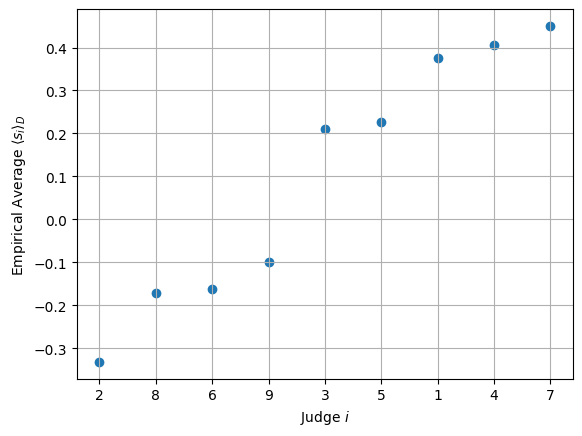

In [2094]:
def empirical_averages(judges):
    averages = []
    for judge in judges:
        i = int(judge) - 1
        si_values = [data_point[i] for data_point in data_modified]
        avg_si = sum(si_values) / len(si_values)
        averages.append(avg_si)
    return np.array(averages)

judges = np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9'])
n = len(judges)

averages_emp = empirical_averages(judges)

order = averages_emp.argsort()

sorted_judges = judges[order]
sorted_averages_emp = averages_emp[order]

plt.scatter(sorted_judges, sorted_averages_emp, marker='o')
plt.xlabel(r'Judge $i$')
plt.ylabel(r'Empirical Average $\langle s_i\rangle_D$')
plt.xticks(judges)
plt.grid(True)
plt.savefig("figures/Q6_3a")
plt.show()

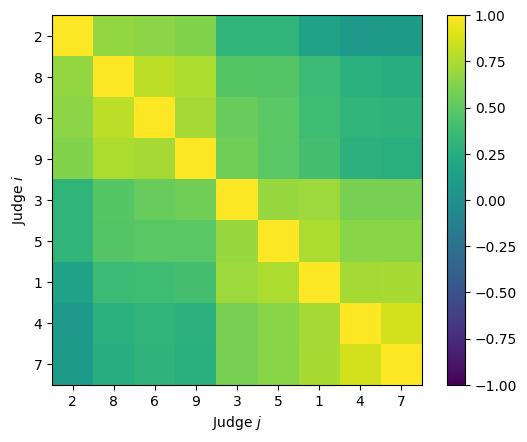

In [2095]:
def empirical_averages_pairs(judges):
    averages_matrix = np.zeros((n, n))
    for judge1 in judges:
        for judge2 in judges:
            i = int(judge1) - 1
            j = int(judge2) - 1
            si_values = [data_point[i] for data_point in data_modified]
            sj_values = [data_point[j] for data_point in data_modified]
            avg_sisj = sum(np.multiply(si_values,sj_values)) / len(si_values)
            averages_matrix[i,j] = avg_sisj
    return averages_matrix

averages_emp_matrix = empirical_averages_pairs(judges)
sorted_averages_emp_matrix = averages_emp_matrix[order][:, order]

plt.imshow(sorted_averages_emp_matrix)
plt.colorbar()
plt.clim(-1, 1)
plt.xlabel(r'Judge $j$')
plt.ylabel(r'Judge $i$')
plt.xticks(range(0,9), sorted_judges)
plt.yticks(range(0,9), sorted_judges)
plt.savefig("figures/Q6_3b")
plt.show()

### Q6.4

In [2096]:
fitted_hi = np.loadtxt("hi_ussc_unsorted.txt")
fitted_Jij = np.loadtxt("Jij_ussc_unsorted.txt")

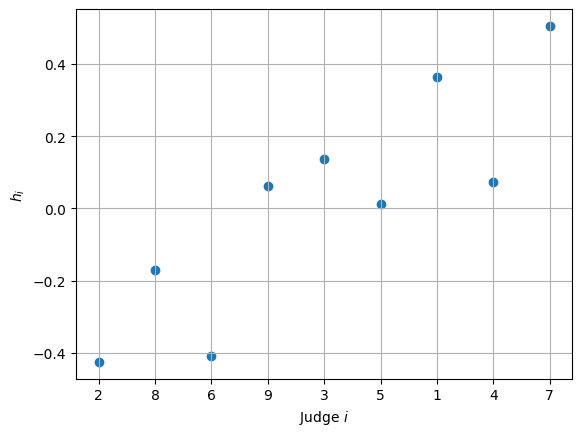

In [2097]:
sorted_hi = fitted_hi[order]

# Plot empirical averages
plt.scatter(sorted_judges, sorted_hi, marker='o')
plt.xlabel(r'Judge $i$')
plt.ylabel(r'$h_i$')
plt.xticks(judges)
plt.grid(True)
plt.savefig("figures/Q6_4a")
plt.show()

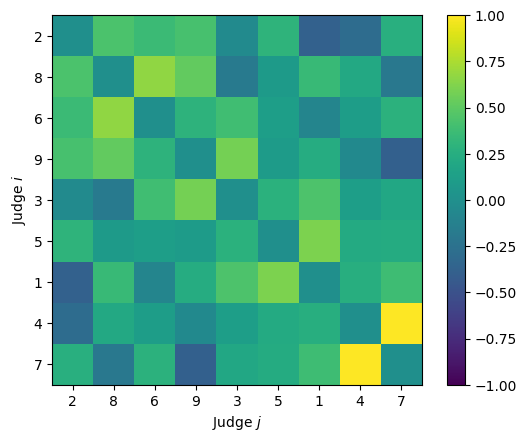

In [2098]:
coupling_matrix = np.zeros((n, n))

row, col = np.triu_indices(n, k=1)
coupling_matrix[row, col] = fitted_Jij

# Reflect the upper triangular part to the lower triangular part
coupling_matrix += coupling_matrix.T

# Set diagonal elements to zero
np.fill_diagonal(coupling_matrix, 0)

sorted_coupling_matrix = coupling_matrix[order][:,order]

# Plot the heatmap
plt.imshow(sorted_coupling_matrix)
plt.colorbar()
plt.clim(-1, 1)
plt.xlabel(r'Judge $j$')
plt.ylabel(r'Judge $i$')
plt.xticks(range(0,9), sorted_judges)
plt.yticks(range(0,9), sorted_judges)
plt.savefig("figures/Q6_4b")
plt.show()

### Q6.5

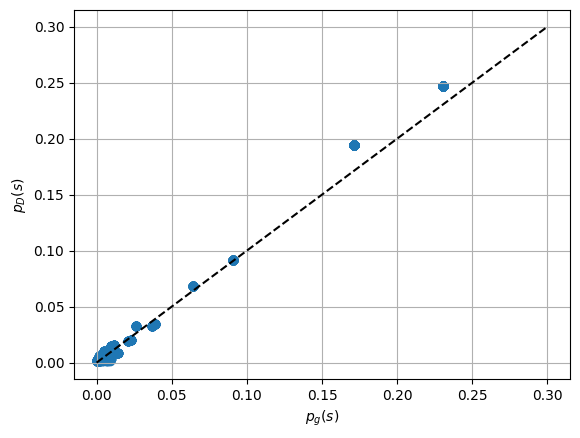

In [2099]:
def E(state):
    energie = 0
    for i in range(0,9):
        energie -= fitted_hi[i]*state[i]
    for i in range(0,8):
        for j in range(i+1,9):
            energie -= coupling_matrix[i][j]*state[i]*state[j]
    return energie

def model_probability(state):
    p_mod = np.exp(-E(state))/Z
    return p_mod

def K(state):
    K = 0
    for s in data_modified:
        if s == state:
            K += 1
    return K

def empirical_probability(state):
    p_emp = K(state)/N
    return p_emp

possible_states = list(itertools.product([-1, 1], repeat=n))

Z = 0
for s in possible_states:
    energie = E(s)
    Z += np.exp(-energie)

model_probabilities = []
empirical_probabilities = []

for state in data_modified:
    p_emp = empirical_probability(state)
    p_mod = model_probability(state)

    empirical_probabilities.append(p_emp)
    model_probabilities.append(p_mod)

plt.plot([0, 0.3], [0, 0.3], color='black', linestyle='--')
plt.scatter(model_probabilities, empirical_probabilities)
plt.xlabel(r'$p_g(s)$')
plt.ylabel(r'$p_D(s)$')
plt.grid(True)
plt.savefig("figures/Q6_5")
plt.show()

### Q6.6

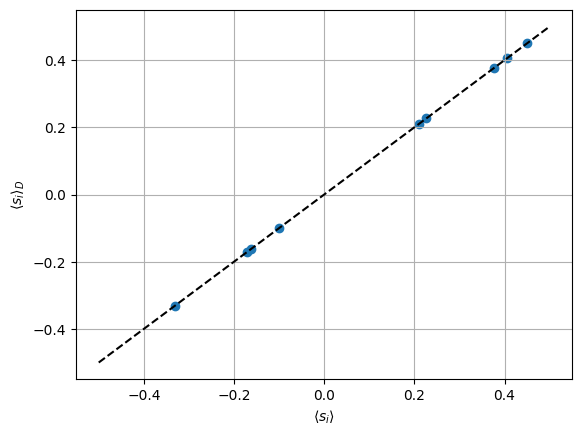

In [2100]:
def model_averages(judges):
    averages = []
    for judge in judges:
        i = int(judge) - 1
        avg_si = 0
        for s in possible_states:
            p_s = model_probability(s)
            avg_si += p_s*s[i]
        averages.append(avg_si)
    return np.array(averages)

averages_mod = model_averages(judges)
sorted_averages_mod = averages_mod[order]

plt.plot([-0.5, 0.5], [-0.5, 0.5], color='black', linestyle='--')
plt.scatter(averages_mod, averages_emp)
plt.xlabel(r'$\langle s_i\rangle$')
plt.ylabel(r'$\langle s_i\rangle_D$')
plt.grid(True)
plt.savefig("figures/Q6_6a")
plt.show()

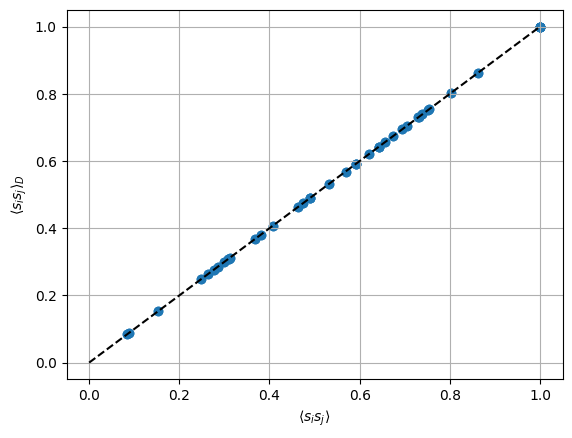

In [2101]:
def model_averages_pairs(judges):
    averages_matrix = np.zeros((n, n))
    for judge1 in judges:
        for judge2 in judges:
            i = int(judge1) - 1
            j = int(judge2) - 1
            avg_sisj = 0
            for s in possible_states:
                p_s = model_probability(s)
                avg_sisj += p_s*s[i]*s[j]
                averages_matrix[i,j] = avg_sisj
    return averages_matrix

averages_mod_matrix = model_averages_pairs(judges)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.scatter(averages_mod_matrix, averages_emp_matrix)
plt.xlabel(r'$\langle s_is_j\rangle$')
plt.ylabel(r'$\langle s_is_j\rangle_D$')
plt.grid(True)
plt.savefig("figures/Q6_6b")
plt.show()


### Q6.7

0.6882681564245811
0.3340782122905028
0.605586592178771
0.7027932960893855
0.6134078212290502
0.41899441340782123
0.7251396648044692
0.4145251396648045
0.45027932960893857


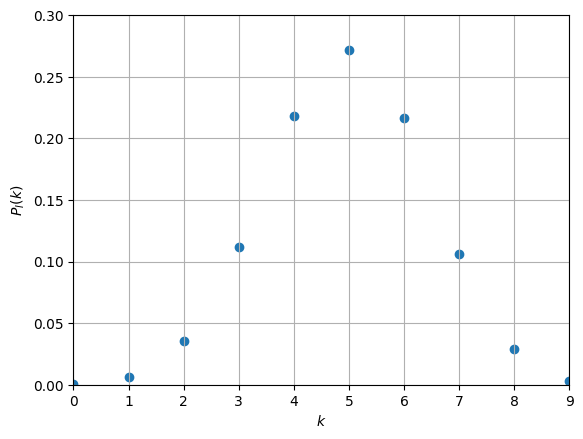

In [2102]:
probabilites_judges = []
for judge in judges:
    i = int(judge) - 1
    si_values = [data_point[i] for data_point in data_int]
    prob_si = sum(si_values) / len(si_values)
    print(prob_si)
    probabilites_judges.append(prob_si)

def probability_PI(k):
    PI_k = 0
    for combination in combinations(range(n), k):
        prob_product = np.prod([probabilites_judges[i] for i in combination]) * np.prod([(1 - probabilites_judges[j]) for j in range(n) if j not in combination])
        PI_k += prob_product
    return PI_k

k_values = range(n+1)
PI_values = [probability_PI(k) for k in k_values]

plt.scatter(k_values, PI_values)
plt.xlabel(r'$k$')
plt.ylabel(r'$P_I(k)$')
plt.xlim(0, 9)
plt.ylim(0, 0.3)
plt.grid(True)
plt.savefig("figures/Q6_7")
plt.show()

### Q6.8

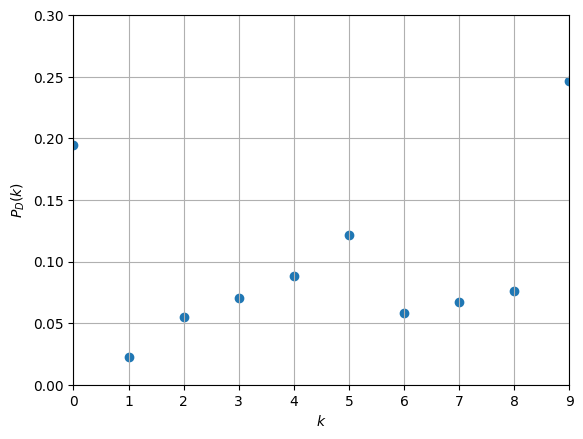

In [2103]:
def probability_PD(k):
    count_k = 0
    for data_point in data_int:
        if sum(data_point) == k:
            count_k += 1
    return count_k / N

k_values = range(n+1)
PD_values = [probability_PD(k) for k in k_values]

plt.scatter(k_values, PD_values)
plt.xlabel(r'$k$')
plt.ylabel(r'$P_D(k)$')
plt.xlim(0, 9)
plt.ylim(0, 0.3)
plt.grid(True)
plt.savefig("figures/Q6_8")
plt.show()

### Q6.9

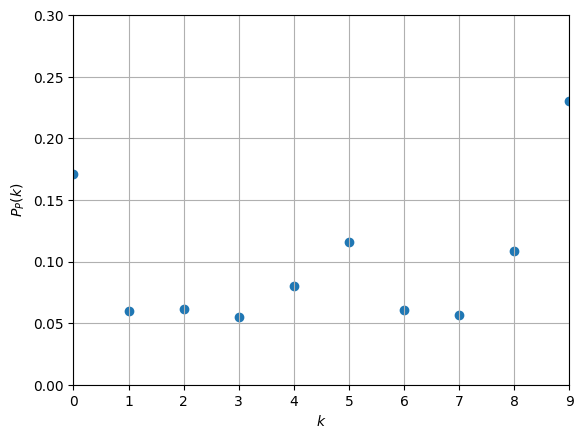

In [2104]:
def probability_PP(k):
    PP_k = 0
    for state in possible_states:
        if sum(state) == k - (n-k):
            PP_k += model_probability(state)
    return PP_k

k_values = range(n+1)
PP_values = [probability_PP(k) for k in k_values]

plt.scatter(k_values, PP_values)
plt.xlabel(r'$k$')
plt.ylabel(r'$P_P(k)$')
plt.xlim(0, 9)
plt.ylim(0, 0.3)
plt.grid(True)
plt.savefig("figures/Q6_9")
plt.show()

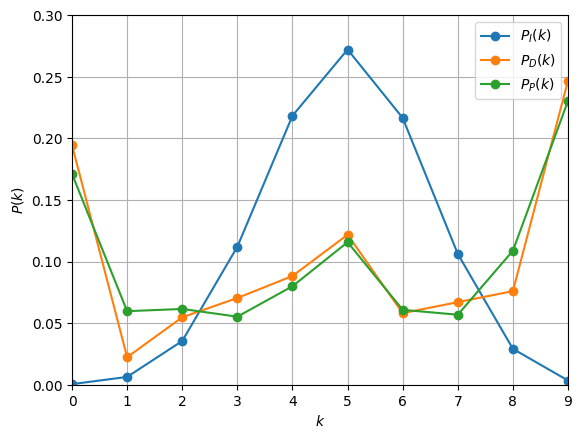

In [2105]:
plt.plot(k_values, PI_values, marker='o', linestyle='-', label=r'$P_I(k)$')
plt.plot(k_values, PD_values, marker='o', linestyle='-', label=r'$P_D(k)$')
plt.plot(k_values, PP_values, marker='o', linestyle='-', label=r'$P_P(k)$')
plt.xlabel(r'$k$')
plt.ylabel(r'$P(k)$')
plt.xlim(0, 9)
plt.ylim(0, 0.3)
plt.legend()
plt.grid(True)
plt.savefig("figures/Q6_9bonus")
plt.show()